In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv("Meteorite Landing - Meteorite-Landings.csv")


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            45716 non-null  object
 1   ID              45716 non-null  int64 
 2   NameType        45716 non-null  object
 3   Classification  45716 non-null  object
 4   Mass            45716 non-null  object
 5   Fall            45716 non-null  object
 6   Year            45716 non-null  object
 7   Coordinates     45716 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.8+ MB


,ID
count,45716.000000
mean,26889.735104
std,16860.683030
min,1.000000
25%,12688.750000
50%,24261.500000
75%,40656.750000
max,57458.000000


In [19]:

df['mass'] = df['mass'].str.extract(r'\[(\d+\.?\d*)')[0].astype(float)

coords = df['coordinates'].str.extract(r'\{(-?\d+\.?\d*),\s*(-?\d+\.?\d*)\}')

df[['lat', 'long']] = coords.astype(float)

df.drop(columns=['coordinates'], inplace=True)

data_stats = df[['mass', 'year', 'lat', 'long']].describe()

print(data_stats)



               mass         year           lat          long
count  3.192800e+04  31928.00000  31928.000000  31928.000000
mean   1.854345e+04   1987.02966    -47.270590     73.185777
std    6.868603e+05     25.96568     46.717798     83.186401
min    0.000000e+00   1399.00000    -87.366670   -165.433330
25%    6.500000e+00   1982.00000    -79.683330     26.000000
50%    2.960000e+01   1991.00000    -72.000000     56.818810
75%    2.020000e+02   2000.00000     18.333330    159.393610
max    6.000000e+07   2013.00000     81.166670    178.200000


In [20]:
df.head()

,name,id,nametype,classification,mass,fall,year,mass_g,reclat,reclong,mass_kg,lat,long
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,21.0,50.77500,6.08333,0.021,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,720.0,56.18333,10.23333,0.720,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,107000.0,54.21667,-113.00000,107.000,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,1914.0,16.88333,-99.90000,1.914,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,780.0,-33.16667,-64.95000,0.780,-33.16667,-64.95000


In [21]:
df.isnull().sum()

name              0
id                0
nametype          0
classification    0
mass              0
fall              0
year              0
mass_g            0
reclat            0
reclong           0
mass_kg           0
lat               0
long              0
dtype: int64

In [23]:
heavy_meteorites = df.nlargest(10, 'mass')
heavy_meteorites



,name,id,nametype,classification,mass,fall,year,mass_g,reclat,reclong,mass_kg,lat,long
16392,Hope,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,60000000.0,-19.58333,17.91667,60000.0,-19.58333,17.91667
5373,Catalina 011,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,58200000.0,76.13333,-64.93333,58200.0,76.13333,-64.93333
5365,Catalina 003,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,50000000.0,-27.46667,-60.58333,50000.0,-27.46667,-60.58333
5370,Catalina 008,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891.0,30000000.0,35.05000,-111.03333,30000.0,35.05000,-111.03333
3455,Asuka 8602,2335,Valid,"Iron, IIIE",28000000.0,Found,1898.0,28000000.0,47.00000,88.00000,28000.0,47.00000,88.00000
12613,Glorieta Mountain,10912,Valid,"Iron, IVA",26000000.0,Found,1836.0,26000000.0,-25.50000,18.00000,26000.0,-25.50000,18.00000
5468,Colorado Springs,5363,Valid,"Iron, IIIAB",24300000.0,Found,1852.0,24300000.0,27.00000,-105.10000,24300.0,27.00000,-105.10000
26297,Mundrabilla 005,16852,Valid,"Iron, IAB-ung",24000000.0,Found,1911.0,24000000.0,-30.78333,127.55000,24000.0,-30.78333,127.55000
920,Sinai,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947.0,23000000.0,46.16000,134.65333,23000.0,46.16000,134.65333
5016,Bates Nunataks A78005,4919,Valid,"Iron, ungrouped",22000000.0,Found,1863.0,22000000.0,26.20000,-107.83333,22000.0,26.20000,-107.83333


Text(0.5, 1.0, 'Meteorite Fall vs Find')

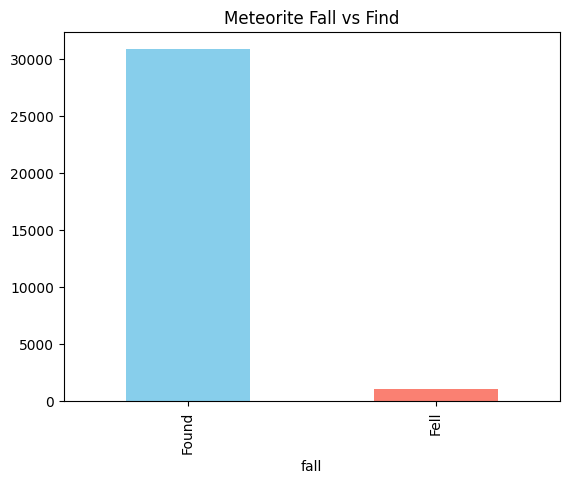

In [25]:
fall_cnt = df['fall'].value_counts()
fall_cnt.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Meteorite Fall vs Find')

In [27]:
cmn_classes = df['classification'].value_counts().head(5)
cmn_classes

classification
L6    6522
H5    5586
H4    3324
H6    3231
L5    2723
Name: count, dtype: int64

Text(0.5, 1.0, 'Average Mass of Top 5 Meteorite Classes')

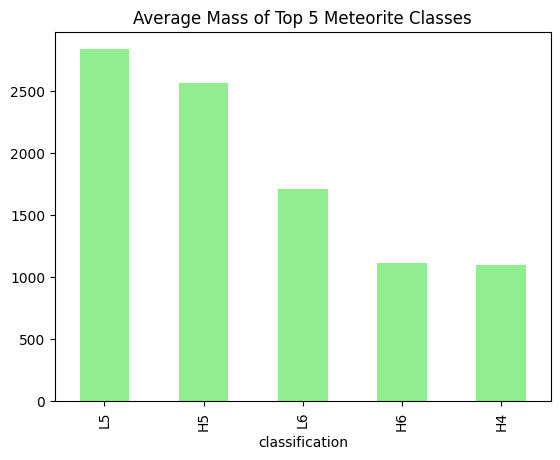

In [30]:
cmn_classes = (df[df['classification'].isin(cmn_classes.index)].groupby('classification')['mass'].mean().sort_values(ascending=False))
cmn_classes.plot(kind='bar', color='lightgreen')
plt.title('Average Mass of Top 5 Meteorite Classes')

In [31]:
data_decade = df.dropna(subset=['year'])
data_decade['decade'] = (data_decade['year'] // 10) * 10
decade_counts = data_decade['decade'].value_counts().sort_index()
decade_counts

decade
1390.0       1
1490.0       2
1570.0       1
1580.0       1
1600.0       1
1620.0       3
1630.0       2
1660.0       1
1670.0       1
1680.0       1
1710.0       2
1720.0       2
1740.0       3
1750.0       3
1760.0       3
1770.0       3
1780.0       5
1790.0      11
1800.0      21
1810.0      30
1820.0      28
1830.0      33
1840.0      47
1850.0      71
1860.0      95
1870.0      88
1880.0     121
1890.0     125
1900.0     136
1910.0     151
1920.0     157
1930.0     298
1940.0     188
1950.0     201
1960.0     375
1970.0    4955
1980.0    6801
1990.0    9061
2000.0    8073
2010.0     827
Name: count, dtype: int64

In [33]:
mean_mass = np.mean(df['mass'])
median_mass = np.median(df['mass'])
std_mass = np.std(df['mass'])
sum_mass = np.sum(df['mass'])
max_mass = np.max(df['mass'])
print(f"Mean mass: {mean_mass:.2f} g")
print(f"Median mass: {median_mass:.2f} g")
print(f"Standard deviation of mass: {std_mass:.2f} g")
print(f"Total mass of all meteorites: {sum_mass:.2f} g")
print(f"Maximum mass: {max_mass:.2f} g")

Mean mass: 18543.45 g
Median mass: 29.60 g
Standard deviation of mass: 686849.50 g
Total mass of all meteorites: 592055317.68 g
Maximum mass: 60000000.00 g


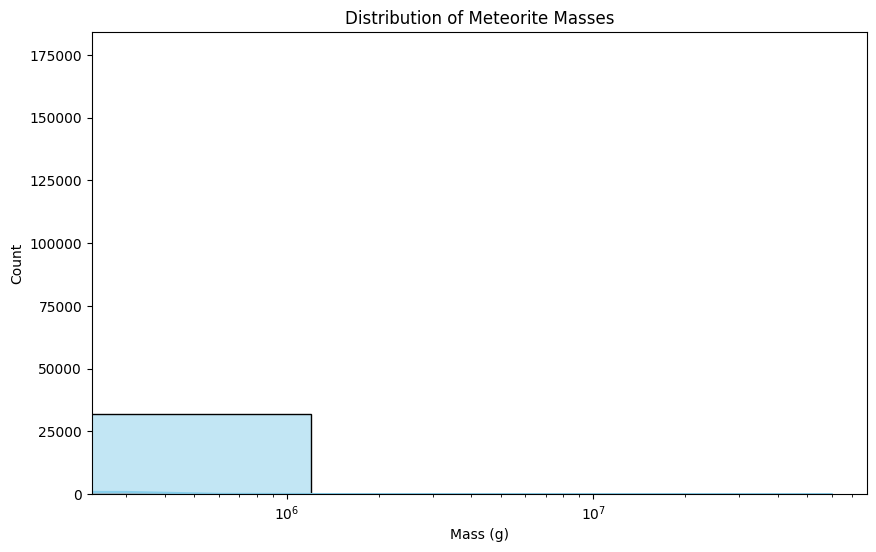

In [36]:

plt.figure(figsize=(10, 6))
sns.histplot(df['mass'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Meteorite Masses')
plt.xlabel('Mass (g)')
plt.ylabel('Count')
plt.xscale('log')  
plt.show()

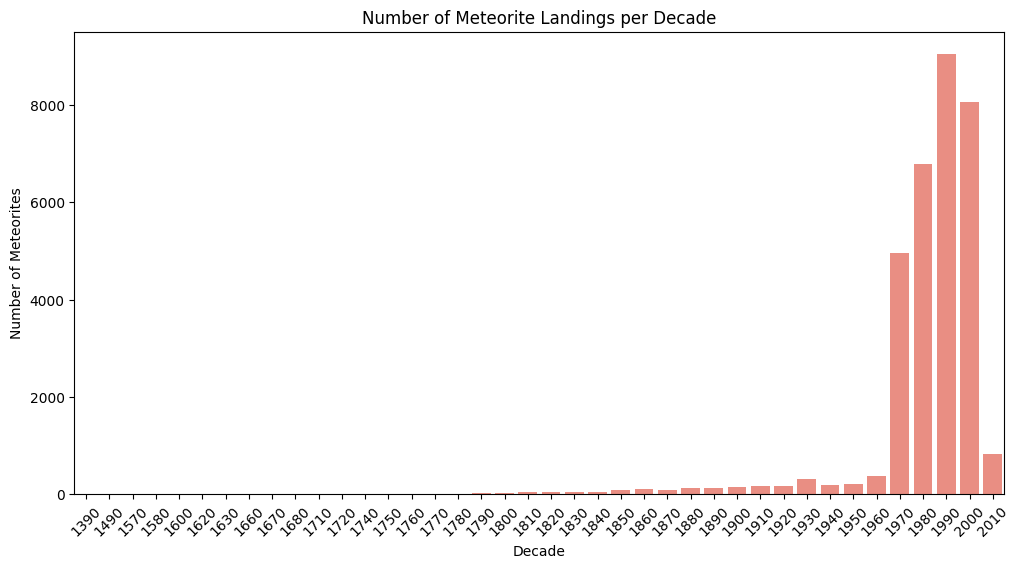

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=decade_counts.index.astype(int), y=decade_counts.values, color='salmon')
plt.title('Number of Meteorite Landings per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Meteorites')
plt.xticks(rotation=45)
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_59664\3401788348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cmn_classes.index, y=cmn_classes.values, palette='viridis')


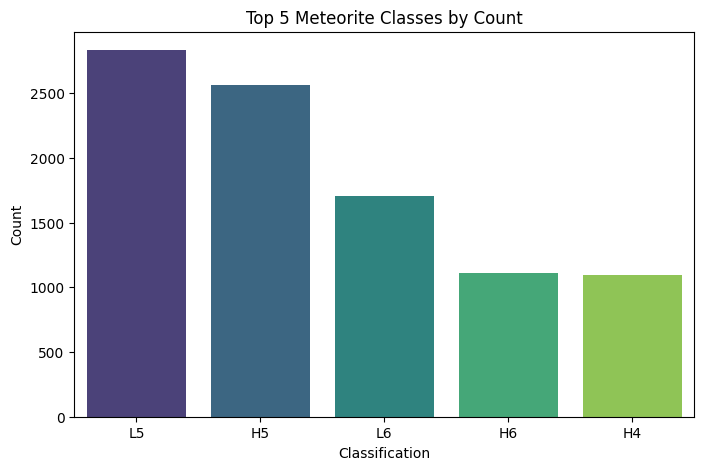

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cmn_classes.index, y=cmn_classes.values, palette='viridis')
plt.title('Top 5 Meteorite Classes by Count')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

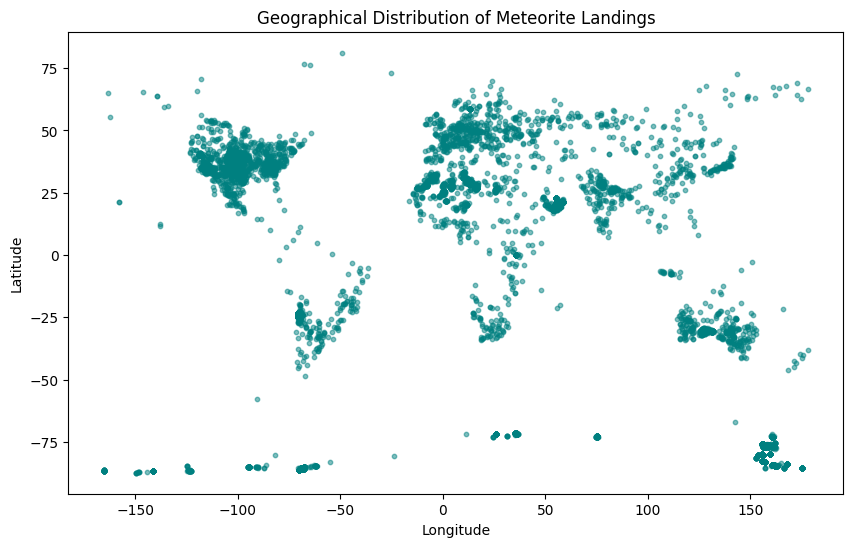

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['long'], df['lat'], alpha=0.5, s=10, color='teal')
plt.title('Geographical Distribution of Meteorite Landings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\Raj\AppData\Local\Temp\ipykernel_59664\3301018069.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fall', y='mass', data=df, palette='Set2')


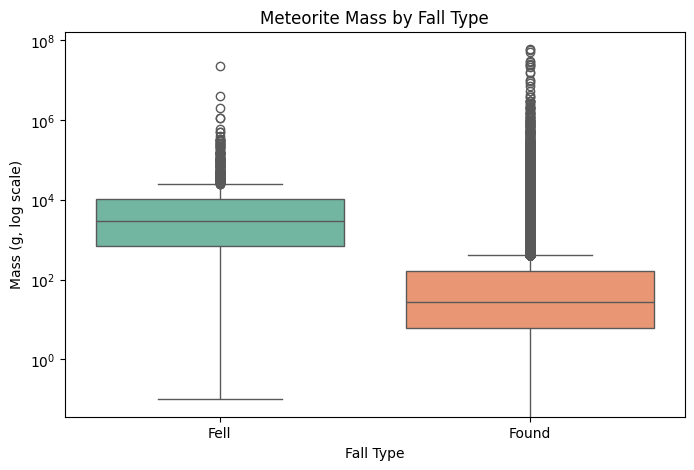

In [40]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fall', y='mass', data=df, palette='Set2')
plt.yscale('log')
plt.title('Meteorite Mass by Fall Type')
plt.xlabel('Fall Type')
plt.ylabel('Mass (g, log scale)')
plt.show()

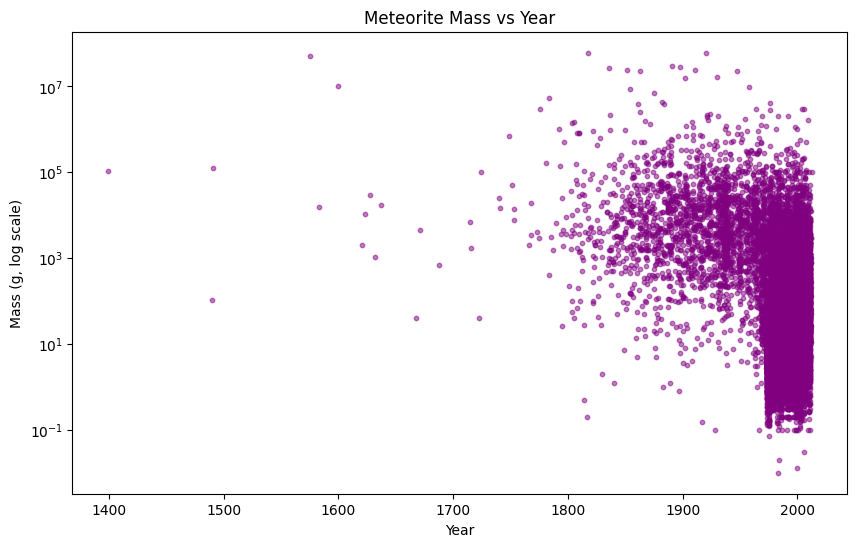

In [41]:

plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['mass'], alpha=0.5, s=10, color='purple')
plt.yscale('log')
plt.title('Meteorite Mass vs Year')
plt.xlabel('Year')
plt.ylabel('Mass (g, log scale)')
plt.show()